# Using L\*a\*b color scheme
L\*a\*b is closer to a euclidean color space, allowing for better distinguishing of colors.
Determining whether or not L*a*b can serve as a better color scheme for clustering. Transforming
back to RGB for visual examination.

In [1]:
import os

# import the necessary packages
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import argparse
# import utils
import cv2
 
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required = True, help = "Path to the image")
# ap.add_argument("-c", "--clusters", required = True, type = int, help = "# of clusters")
# args = vars(ap.parse_args())
 


# import the necessary packages
import numpy as np
import cv2
 
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [2]:
def image_cluster(filepath, k):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, cv2.cvtColor(clt.cluster_centers_.reshape((1, 3, 3)).astype('uint8'), cv2.COLOR_Lab2RGB).reshape(3, 3))

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

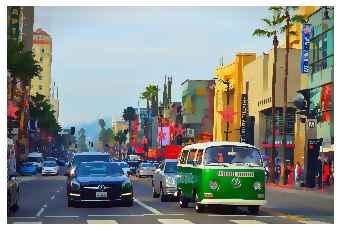

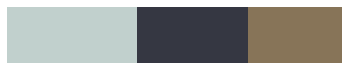

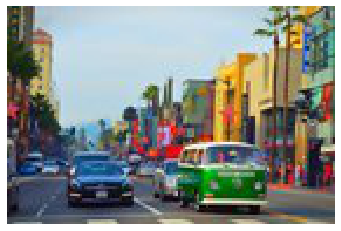

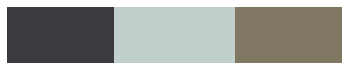

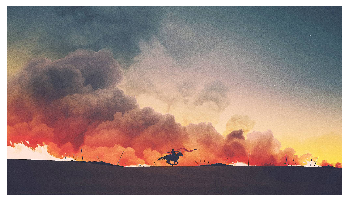

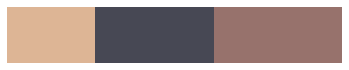

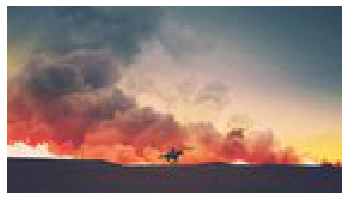

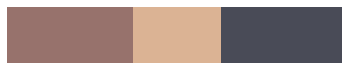

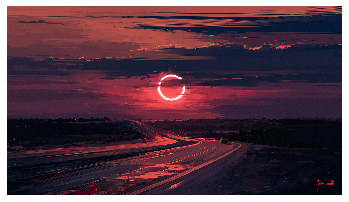

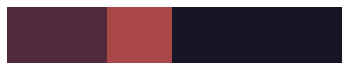

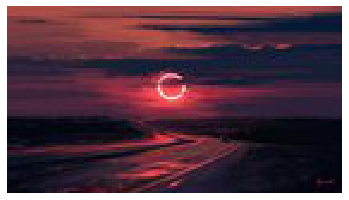

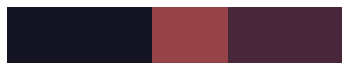

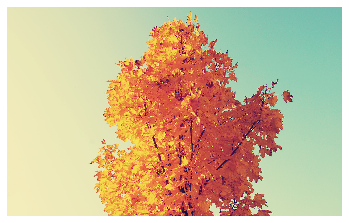

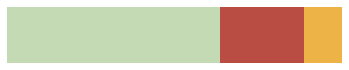

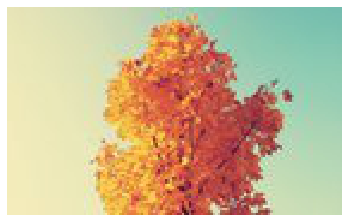

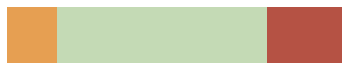

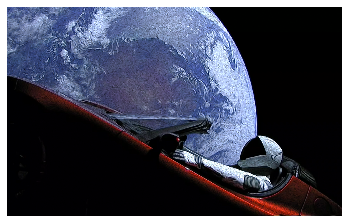

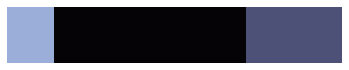

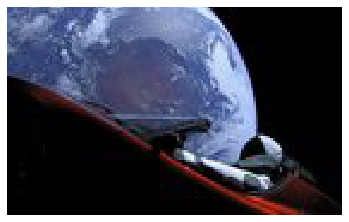

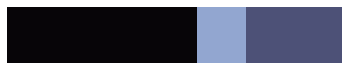

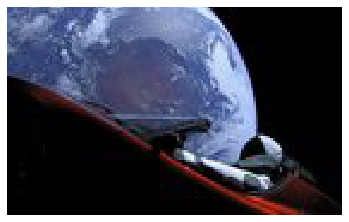

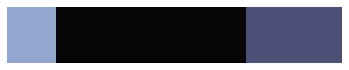

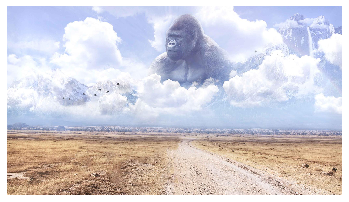

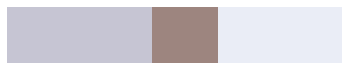

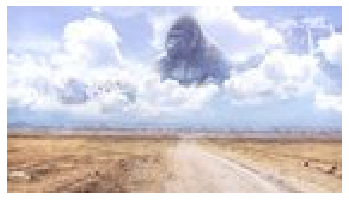

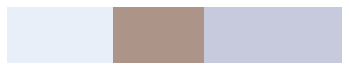

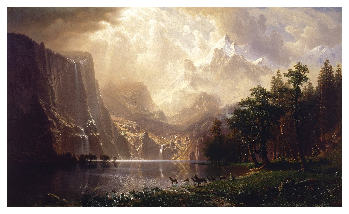

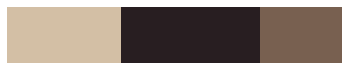

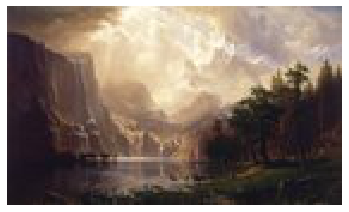

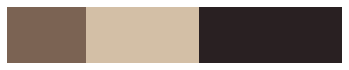

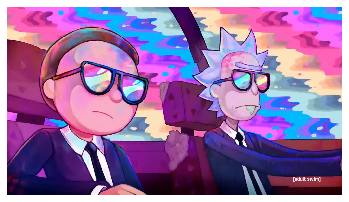

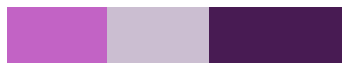

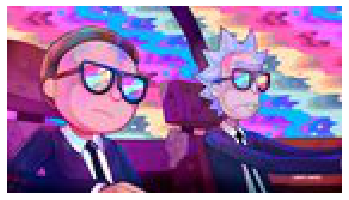

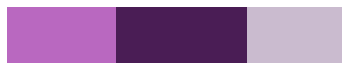

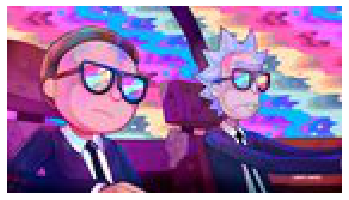

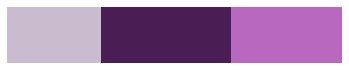

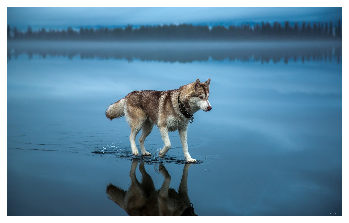

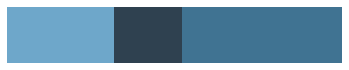

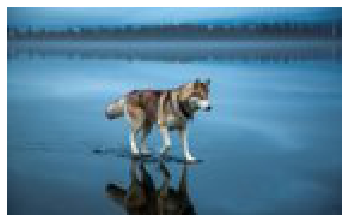

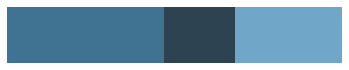

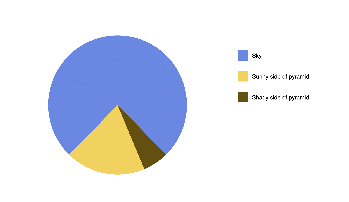

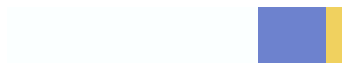

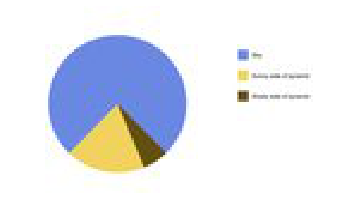

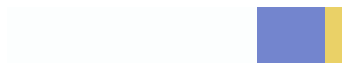

In [3]:
for i in sorted(os.listdir('tmp')):
    image_cluster(f'tmp/{i}', 3)